# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:
* Student Name: Royal Wang
* Student Net ID: rjw8ng
* This URL: http://localhost:8888/notebooks/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/rjw8ng/DS-5100-Final-Project

# The Monte Carlo Module

In [4]:
import pandas as pd
import numpy as np
import random

class Die:
    
    def __init__(self, face):
        self.face = face
        self.weight = [1.0 for i in face]
        self.df = pd.DataFrame({"face": self.face, "weight": self.weight})
    
    def change_weight(self, face_value, new_weight):
        '''
        Takes two arguments: the face value to be changed and the new weight.
        Changes the weights value of the face inputted.
        
        '''
        
        if face_value not in self.df["face"].values:
            print("Face not in DataFrame!")
        else:
            try: 
                self.df.loc[(self.df["face"]==face_value)] = [face_value, float(new_weight)]
                
            except:
                print("Weight value cannot be converted to float!")
                
    def roll(self, amount = 1):
        '''
        Takes a parameter of how many times the die is to be rolled.
        Returns a list of outcomes.
        
        '''
        lst = [i for i in self.df["weight"]]
        sm = sum(lst)
        p = [x / sm for x in lst]
        
        result = np.random.choice([i for i in self.df["face"]], amount, p = p)
        
        return result
    
    def show(self):
        '''
        Returns the dataframe created in the initializer.
        '''
        return self.df
    
class Game:
    
    def __init__(self, die_object):
        self.die_object = die_object
    
    def play(self, turns):
        new_df = pd.DataFrame(columns = ["Roll_Number", "Die", "Roll"])
        
        counter = 0
        for i in self.die_object:
            
            temp_df = pd.DataFrame()
            
            output_list = i.roll(turns)
            length = len(output_list)
            
            
            temp_df["Roll_Number"] = [int(j) for j in range(1, length+1)]
            temp_df["Die"] = [counter for k in range(1, length+1)]
            temp_df["Roll"] = output_list
            
            new_df = pd.concat([new_df, temp_df], ignore_index=True)
            counter += 1
        
        new_df["Roll Number"] = new_df['Roll_Number']
        new_df = new_df[["Roll_Number", "Roll Number", "Die", "Roll"]]
        
        return new_df.set_index('Roll_Number')
        
    def show_game(self, dataframe, form = 'wide'):
        
        if form != 'wide' and form != 'narrow':
            print("Set second arguement to either 'wide' or 'narrow'!")
            
        elif form == 'wide':
            return dataframe.pivot(index = "Roll Number", columns = "Die", values = "Roll")
        else:
            return dataframe.set_index(["Die", "Roll Number"]) 
        
class Analyzer:
    
    def __init__(self, result):
        self.result = result
        self.jackpot_result = pd.DataFrame({"Roll Number": [],"Value": []})
        
    def jackpot(self):
        '''
        Returns an integer for the number times to the user.
        Stores the results as a dataframe of jackpot results in a public attribute.
        
        '''
        self.jackpot_df = pd.DataFrame({"Roll Number": [],"Value": []})
        
        jackpot_count = 0
        
        turns = max(self.result["Roll Number"])
        
        for i in range(1, turns + 1):
            lst = [j for j in self.result[self.result["Roll Number"]==i]["Roll"]]
            
            counts = lst.count(lst[0])
            list_length = len(lst)
            
            if counts == list_length:
                self.jackpot_df.loc[len(self.jackpot_df)] = [i, lst[0]]
                jackpot_count += 1
            else:
                pass
            
        self.jackpot_result = self.jackpot_df
        
        return jackpot_count
                   
    def combo(self):
        '''
        Compute the distinct combinations of faces rolled, along with their counts.
        Stores the results as a dataframe in a public attribute.
        
        '''
        self.combo_df = pd.DataFrame()
        
        temp_lst = [i for i in self.result["Roll"]]
        temp_lst = sorted(list(set(temp_lst)))
        
        columns = []
        for i in range(1, len(set(self.result["Die"]))+1):
            columns.append(i) 
            self.combo_df[i] = ""
        self.combo_df["count"] = ""
        
        temp_dict = {}
        
        turns = max(self.result["Roll Number"])
        
        for i in range(1, turns + 1):
            lst = [str(j) for j in self.result[self.result["Roll Number"] == i]["Roll"]]
            
            lst = sorted(lst)
            lst_string = " ".join(lst)
            
            if lst_string in temp_dict:
                temp_dict[lst_string] += 1
            else:
                temp_dict[lst_string] = 1 
        
        for key, value in temp_dict.items():
            lst_values = key.split(" ")
            df_lst = [i for i in lst_values]
            df_lst.append(value)
            self.combo_df.loc[len(self.combo_df)] = df_lst
        
        self.combo_df = self.combo_df.sort_values(by = columns)
        
        return self.combo_df.set_index(columns) 
        
            
    def face_counts_per_roll(self):
        '''
        Compute how many times a given face is rolled in each event.
        Stores the results as a dataframe in a public attribute.
        
        '''
        
        turns = max(self.result["Roll Number"])
        distinct_outcomes = set(self.result["Roll"])
        distinct_outcomes = sorted([i for i in distinct_outcomes])
        
        df = pd.DataFrame()
        
        for i in distinct_outcomes:
            df[i] = ""
        
        for i in range(1, turns + 1):
            lst = [j for j in self.result[self.result["Roll Number"] == i]["Roll"]]
            
            temp_list = []
            for j in distinct_outcomes:
                temp_list.append(lst.count(j))
            
            df.loc[len(df)] = temp_list
        
        return df

# Test Module

In [2]:
import unittest
from Die import Die, Game, Analyzer
import pandas.testing as pd_testing
import pandas as pd
import random


class EnrollInTestCase(unittest.TestCase): 
    
    def test_1_change_weight_tofloat__test(self):
        Die_Object1 = Die([1,2,3,4,5,6])
        Die_Object2 = pd.DataFrame({"face": [1,2,3,4,5,6], "weight": [1.0,1.0,1.0,1.0,1.0,5.0]})
        Die_Object1.change_weight(6, 5)
        
        self.assertEqual(int(Die_Object1.df["weight"][Die_Object1.df["face"]==6]), int(Die_Object2["weight"][Die_Object2["face"]==6]))
    
    def test_2_change_weight_nonfloat_test(self):
        Die_Object1 = Die([1,2,3,4,5,6])
        Die_Object2 = Die([1,2,3,4,5,6])
        Die_Object1.change_weight(6, "yes")
        
        self.assertEqual(int(Die_Object1.df["weight"][Die_Object1.df["face"]==6]), int(Die_Object2.df["weight"][Die_Object2.df["face"]==6]))
        
    def test_3_change_weight_not_face_test(self):
        Die_Object1 = Die([1,2,3,4,5,6])
        Die_Object2 = Die([1,2,3,4,5,6])
        Die_Object1.change_weight(7, 5.0)
        
        self.assertEqual(int(Die_Object1.df["weight"][Die_Object1.df["face"]==6]), int(Die_Object2.df["weight"][Die_Object2.df["face"]==6]))
        
    def test_4_roll_test(self):
        Die_Object = Die([1,2,3,4,5,6])
        result = Die_Object.roll(6)
        
        self.assertEqual(len(result), 6)
        
    def test_5_show_test(self):
        Die_Object = Die([1,2,3,4,5,6])
        
        pd_testing.assert_frame_equal(Die_Object.df, Die_Object.show())

    def test_6_play(self):
        D1 = Die([1,2,3,4,5,6])
        D2 = Die([1,2,3,4,5,6])
        D3 = Die([1,2,3,4,5,6])
        D2.change_weight(6,5.0)
        lst = [D1, D2, D3]
        gm = Game(lst)
        
        df = gm.play(3)
        
        Roll_number = [i for i in gm.play(3)["Roll Number"]]
        Dies = [i for i in gm.play(3)["Die"]]
        
        self.assertTrue([[1,2,3,1,2,3,1,2,3], [0,0,0,1,1,1,2,2,2]], [Roll_number, Dies])
        
    
    def test_7_show_wide(self):
        D1 = Die([1,2,3,4,5,6])
        D2 = Die([1,2,3,4,5,6])
        D3 = Die([1,2,3,4,5,6])
        D2.change_weight(6,5.0)
        lst = [D1, D2, D3]
        gm = Game(lst)
        
        col = [i for i in gm.show_game(gm.play(4), "wide").columns]
        index = list(gm.show_game(gm.play(4), "wide").index.values)
        
        self.assertEqual([col, index], [[0,1,2], [1,2,3,4]])
        
        
    def test_8_show_narrow(self):
        D1 = Die([1,2,3,4,5,6])
        D2 = Die([1,2,3,4,5,6])
        D3 = Die([1,2,3,4,5,6])
        D2.change_weight(6,5.0)
        lst = [D1, D2, D3]
        gm = Game(lst)
        
        col = [i for i in gm.show_game(gm.play(4), "narrow")["Roll"]]
        
        self.assertEqual(len(col), 12)
        
        
    def test_9_jackpot(self):
        D1 = Die([1,2])
        D2 = Die([1,2])
        lst = [D1, D2]
        gm = Game(lst)
        test = gm.play(10)
        
        analyze = Analyzer(test)
        count = analyze.jackpot()
        
        self.assertEqual(count, len(analyze.jackpot_result.index))
        

    def test_10_combo(self):
        D1 = Die([1,2])
        D2 = Die([1,2])
        lst = [D1, D2]
        
        gm = Game(lst)
        test = gm.play(10)
        
        analyze = Analyzer(test)
        
        self.assertEqual(max(analyze.result["Roll Number"]), sum(analyze.combo()["count"]))
        
    def test_11_face_counts_per_roll(self):
        D1 = Die([1,2])
        D2 = Die([1,2])
        lst = [D1, D2]
        
        gm = Game(lst)
        test = gm.play(10)
        
        analyze = Analyzer(test)
        colname = analyze.face_counts_per_roll().columns
        
        switch = True
        for i in colname:
            result_count = len(analyze.result[analyze.result["Roll"] == i].index)
            method_count = sum(analyze.face_counts_per_roll()[i])
            if result_count == method_count:
                pass
            else:
                swtich = False
                break
                
        self.assertTrue(switch)
        
if __name__ == '__main__':

    unittest.main(verbosity=2)

ModuleNotFoundError: No module named 'Die'

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Games'>

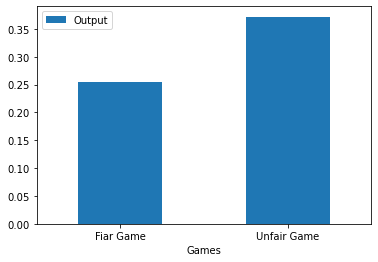

In [5]:
coin1 = Die(["H", "T"])
coin2 = Die(["H", "T"])
coin2.change_weight("T",5.0)

fair_coins = [coin1, coin1, coin1]
unfair_coins = [coin1, coin2, coin2]
        
gm_fair = Game(fair_coins)
gm_unfair = Game(unfair_coins)

game1 = gm_fair.play(1000)
game2 = gm_unfair.play(1000)

analyze1 = Analyzer(game1)
analyze2 = Analyzer(game2)

jackpot1 = analyze1.jackpot()
jackpot2 = analyze2.jackpot()

jackpot_frequecy1 = jackpot1/1000
jackpot_frequecy2 = jackpot2/1000

df = pd.DataFrame({"Games": ["Fiar Game", "Unfair Game"], "Output": [jackpot_frequecy1, jackpot_frequecy2]})

df.plot.bar(x = "Games", y = "Output", rot = 0)

## Scenario 2

C:\Users\Royal Wang\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\Royal Wang\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Games'>

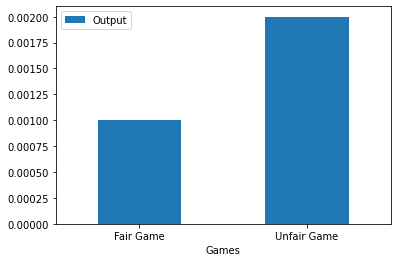

In [28]:
D1 = Die([1,2,3,4,5,6])
D2 = Die([1,2,3,4,5,6])
D3 = Die([1,2,3,4,5,6])

D2.change_weight(6,5.0)
D3.change_weight(1,5.0)

fair_die = [D1, D1, D1, D1, D1]
unfair_die = [D2, D2, D3, D1, D1]

gm_fair = Game(fair_die)
gm_unfair = Game(unfair_die)

game1 = gm_fair.play(1000)
game2 = gm_unfair.play(1000)

analyze1 = Analyzer(game1)
analyze2 = Analyzer(game2)

jackpot1 = analyze1.jackpot()
jackpot2 = analyze2.jackpot()

jackpot_frequecy1 = jackpot1/1000
jackpot_frequecy2 = jackpot2/1000


df = pd.DataFrame({"Games": ["Fair Game", "Unfair Game"], "Output": [jackpot_frequecy1, jackpot_frequecy2]})

df.plot.bar(x = "Games", y = "Output", rot = 0)

<AxesSubplot:title={'center':'10 most frequent combinations of faces (5 fair dice)'}, xlabel='Combinations', ylabel='Frequency'>

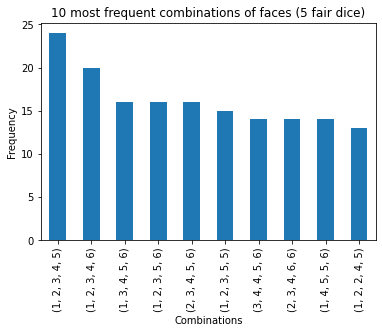

In [27]:
comb_df = analyze1.combo().sort_values(by=['count'], ascending = False)

comb_df['count'].nlargest(n=10).plot.bar(
            title='10 most frequent combinations of faces (5 fair dice)', # Adding a title to the top
            xlabel="Combinations", # Adding a label on the xaxis
            ylabel="Frequency")

<AxesSubplot:title={'center':'10 most frequent combinations of faces (Unfair dice)'}, xlabel='Combinations', ylabel='Frequency'>

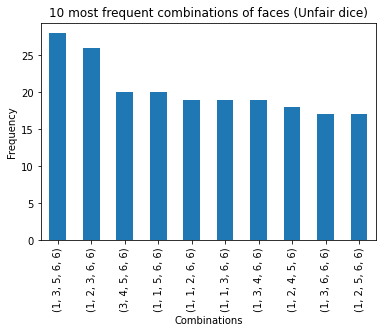

In [5]:
comb_df = analyze2.combo().sort_values(by=['count'], ascending = False)

comb_df['count'].nlargest(n=10).plot.bar(
            title='10 most frequent combinations of faces (Unfair dice)', # Adding a title to the top
            xlabel="Combinations", # Adding a label on the xaxis
            ylabel="Frequency")

## Scenario 3

In [9]:
import string 

letters = list(string.ascii_uppercase)
frequency = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 
            3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

die = Die(letters)
die.weight = frequency
die.df = pd.DataFrame({"face": die.face, "weight": die.weight})

gm = Game([die, die, die, die, die])

game = gm.play(1000)

analyze = Analyzer(game)

permutation_lst = []
        
turns = max(analyze.result["Roll Number"])
        
for i in range(1, turns + 1):
    lst = [str(j) for j in analyze.result[analyze.result["Roll Number"] == i]["Roll"]]
            
    lst_string = " ".join(lst)
            
    if lst_string in permutation_lst:
        pass
    else:
        permutation_lst.append(lst_string)
        
permutation_lst

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


['S O C L S',
 'N H V O O',
 'E U E V A',
 'X T I B R',
 'U E O U T',
 'H E T O R',
 'T E P O S',
 'L E E U A',
 'L O A L L',
 'C E S T G',
 'W A E C I',
 'C U S A T',
 'L N R R R',
 'N I A V M',
 'Y N P P P',
 'A N B L G',
 'I B N A D',
 'P A P P N',
 'S I A N T',
 'A R I R I',
 'E P P E S',
 'S E L N I',
 'M X E D Y',
 'E C U I N',
 'E E T E T',
 'W H W O R',
 'G D D A F',
 'D R R M D',
 'E O T A R',
 'I M O A R',
 'S B O K A',
 'C M M F D',
 'N R O T C',
 'A T R N R',
 'T Y M T A',
 'R E H I E',
 'A R B L R',
 'B N T E A',
 'A S E I D',
 'N O F I R',
 'C Y E L A',
 'E G S L C',
 'O A A W V',
 'O M B I R',
 'D L H A A',
 'U L G C I',
 'G D A A L',
 'C S E T T',
 'W R I E E',
 'L C E I T',
 'A S C R R',
 'T H A A O',
 'E N K U H',
 'E A R R E',
 'E E C R N',
 'D I A T O',
 'O O A H T',
 'W T B T O',
 'I A E E T',
 'E U A W N',
 'M R C N A',
 'D O E I T',
 'L M I N H',
 'E D A X A',
 'E R S E A',
 'P N E T E',
 'I D A G P',
 'C W I A T',
 'I P N N E',
 'L K S L W',
 'C R N N O',
 'S P 

Based on my initial glance through the list of words, I did not see any english words pop up.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [ ]:
!ls -lRF -o

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands